In [ ]:
#import os
#os.chdir('~/git_repos/pointCollection')
import os
cwd=os.getcwd()
%cd ~/git_repos/pointCollection
%pip install -e .  ;
os.chdir(cwd)


In [1]:
# imports

%load_ext autoreload
%autoreload 2
import glob
import pointCollection as pc
import os
import matplotlib.pyplot as plt
import re
#%matplotlib widget
import numpy as np
from sliderule import sliderule, icesat2, earthdata, h5
import geopandas as gpd
import h5py
icesat2.init("slideruleearth.io")

In [2]:
directory={}
thefile='Nordenskjold_binned_photon_stats.h5'
with h5py.File(thefile,'r') as h5f:
    cycles=list(h5f.keys())
    for cycle in cycles:
        directory[cycle]=[]
        for group in h5f[cycle].keys():
            directory[cycle] += [group]


In [3]:
# get the data for a cycle:
D=[]
thecycle='cycle_10'



In [5]:
%matplotlib widget

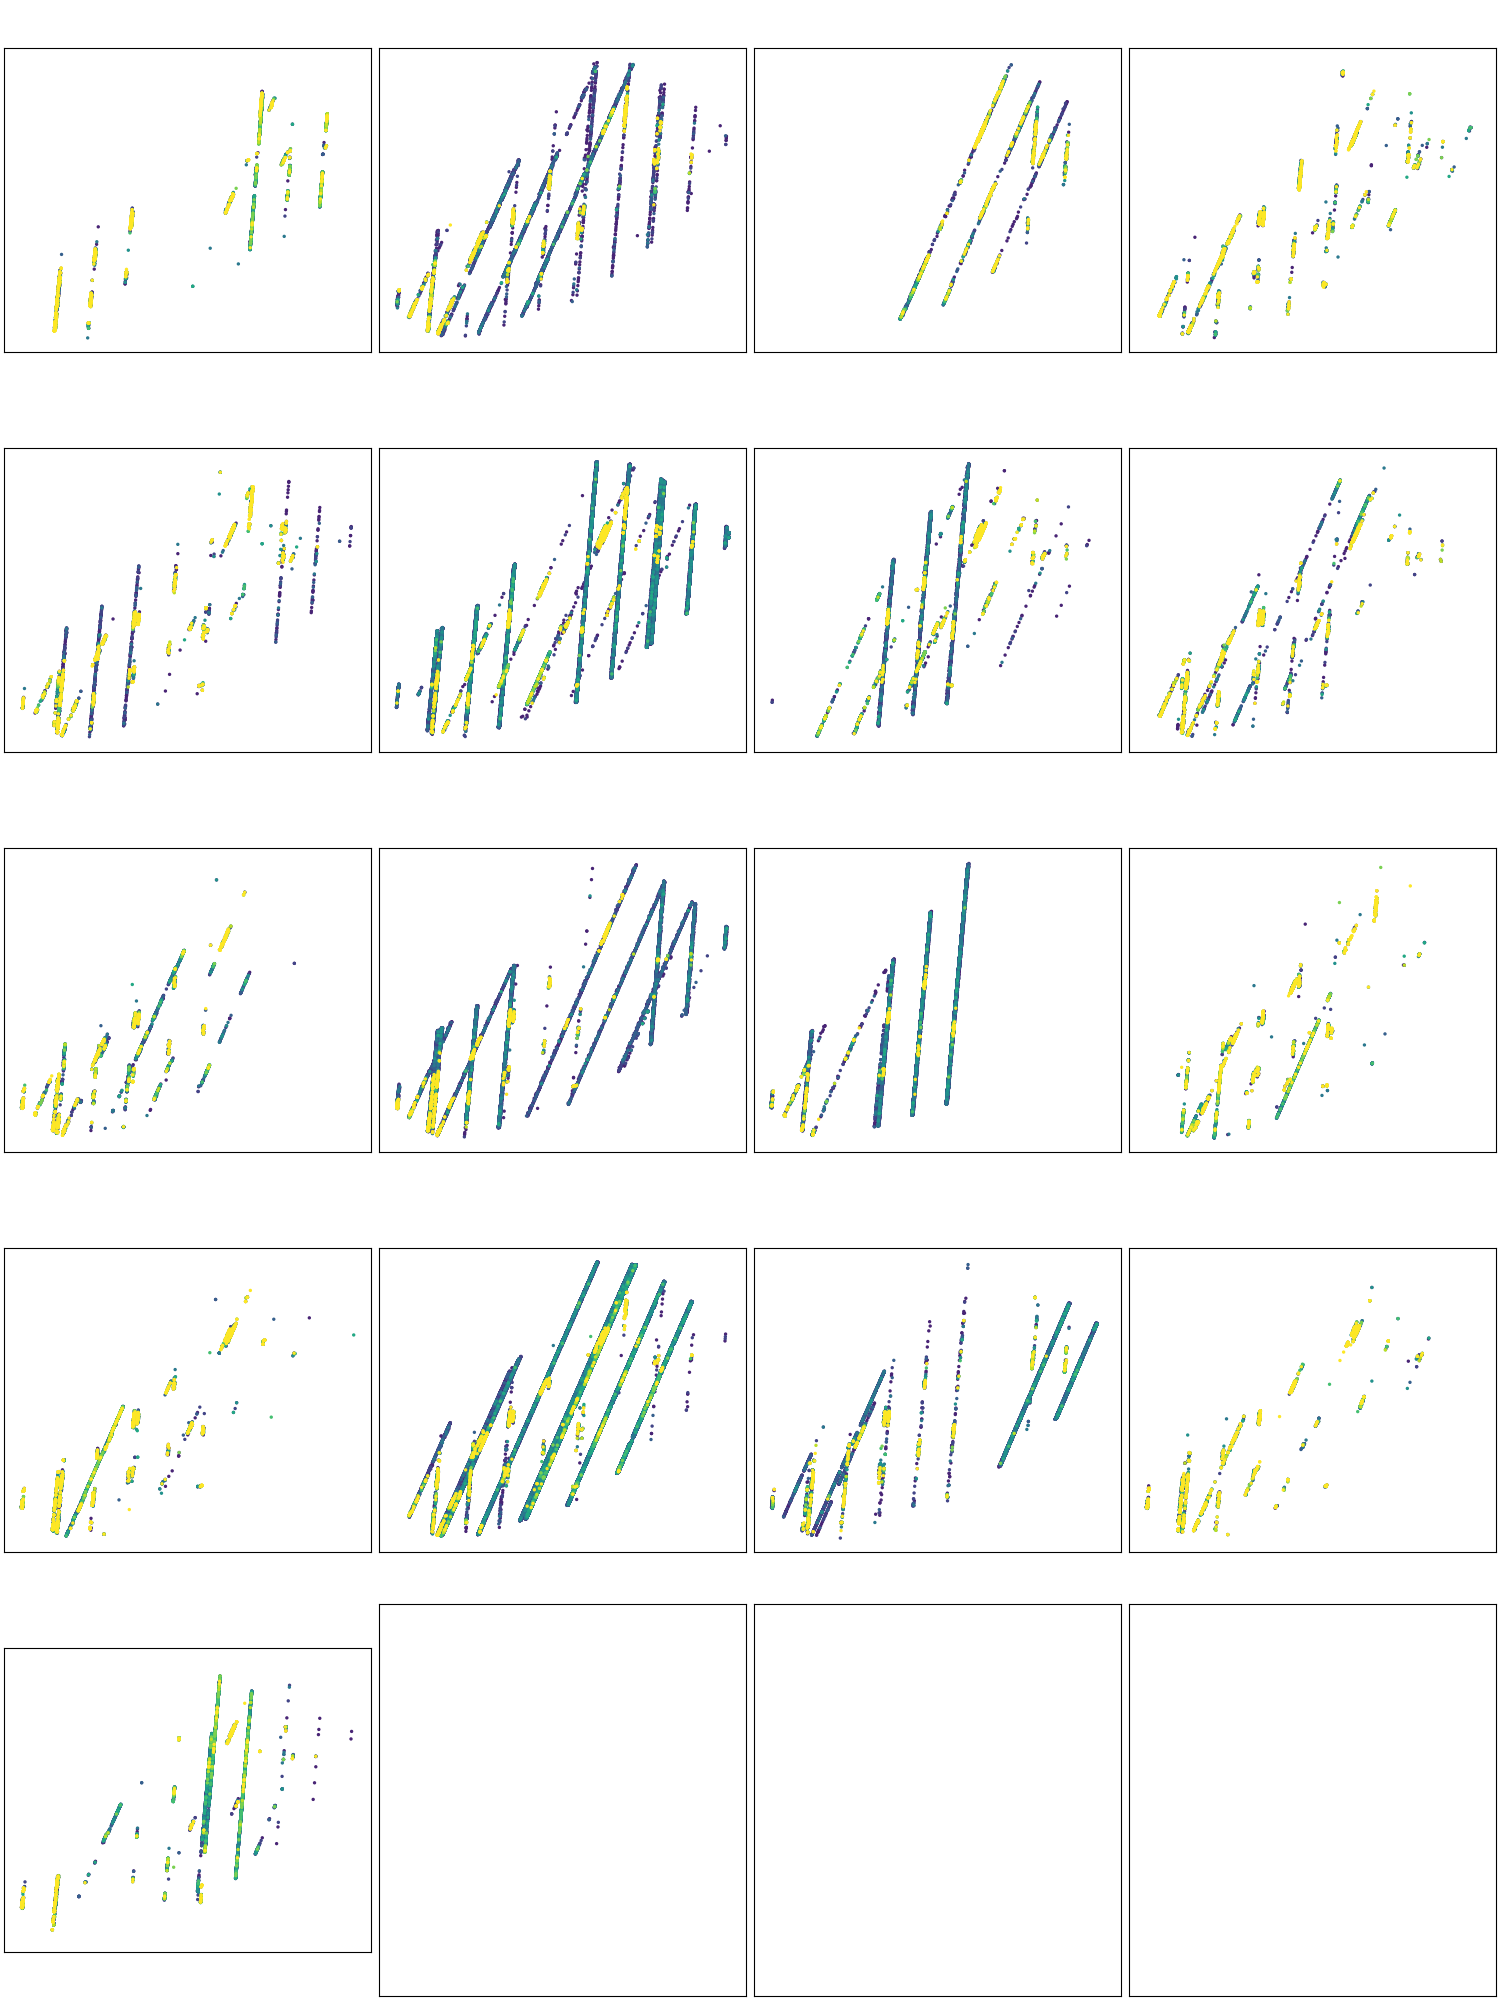

In [29]:
hf, hax=plt.subplots(5, 4, layout='constrained', sharex=True, sharey=True, figsize=[15, 20])

for cycle, ax in zip(range(2, 19), hax.ravel()):
    cycle_group=f'cycle_{cycle}'
    plt.sca(ax)
    D=[]
    for group in directory[cycle_group]:
        D += [pc.data().from_h5(thefile, group=os.path.join(cycle_group, group))]
    D=pc.data().from_list(D)
        
    under=np.flatnonzero(D.dh < -5)
    ii=under[np.argsort(D.N[under])]
    
    ax.scatter(D.x[ii], D.y[ii], 2, c=D.N[ii], clim=[0, 10])
    ax.set_aspect(1)
    ax.set_xticks([])
    ax.set_yticks([])



In [43]:
# to grab the bounds for the current axes:
bds=[plt.gca().get_xlim(), plt.gca().get_ylim()]
# or for demo purposes:
bds=[(-371251.35148272803, -369506.65456715965), (-1458666.8617924978, -1454111.2642907358)];

In [51]:
bds

[(-371251.35148272803, -369506.65456715965),
 (-1458666.8617924978, -1454111.2642907358)]

In [44]:
D={}
for cycle in range(2, 19):
    print(cycle)
    cycle_group=f'cycle_{cycle}'
    for group in directory[cycle_group]:
        if 'weak' in group:
            continue
        temp=pc.data().from_h5(thefile, group=os.path.join(cycle_group, group)).cropped(bds)
        if temp is not None and temp.size > 0:
            if group not in D:
                D[group]={}
            D[group][cycle] = temp


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [49]:
for key, val in D.items():
    print([key, len(val.keys()),  np.sum([Di.size for Di in val.values()])])

['rgt819_p1_strong', 9, 9903]
['rgt1261_p3_strong', 12, 20604]


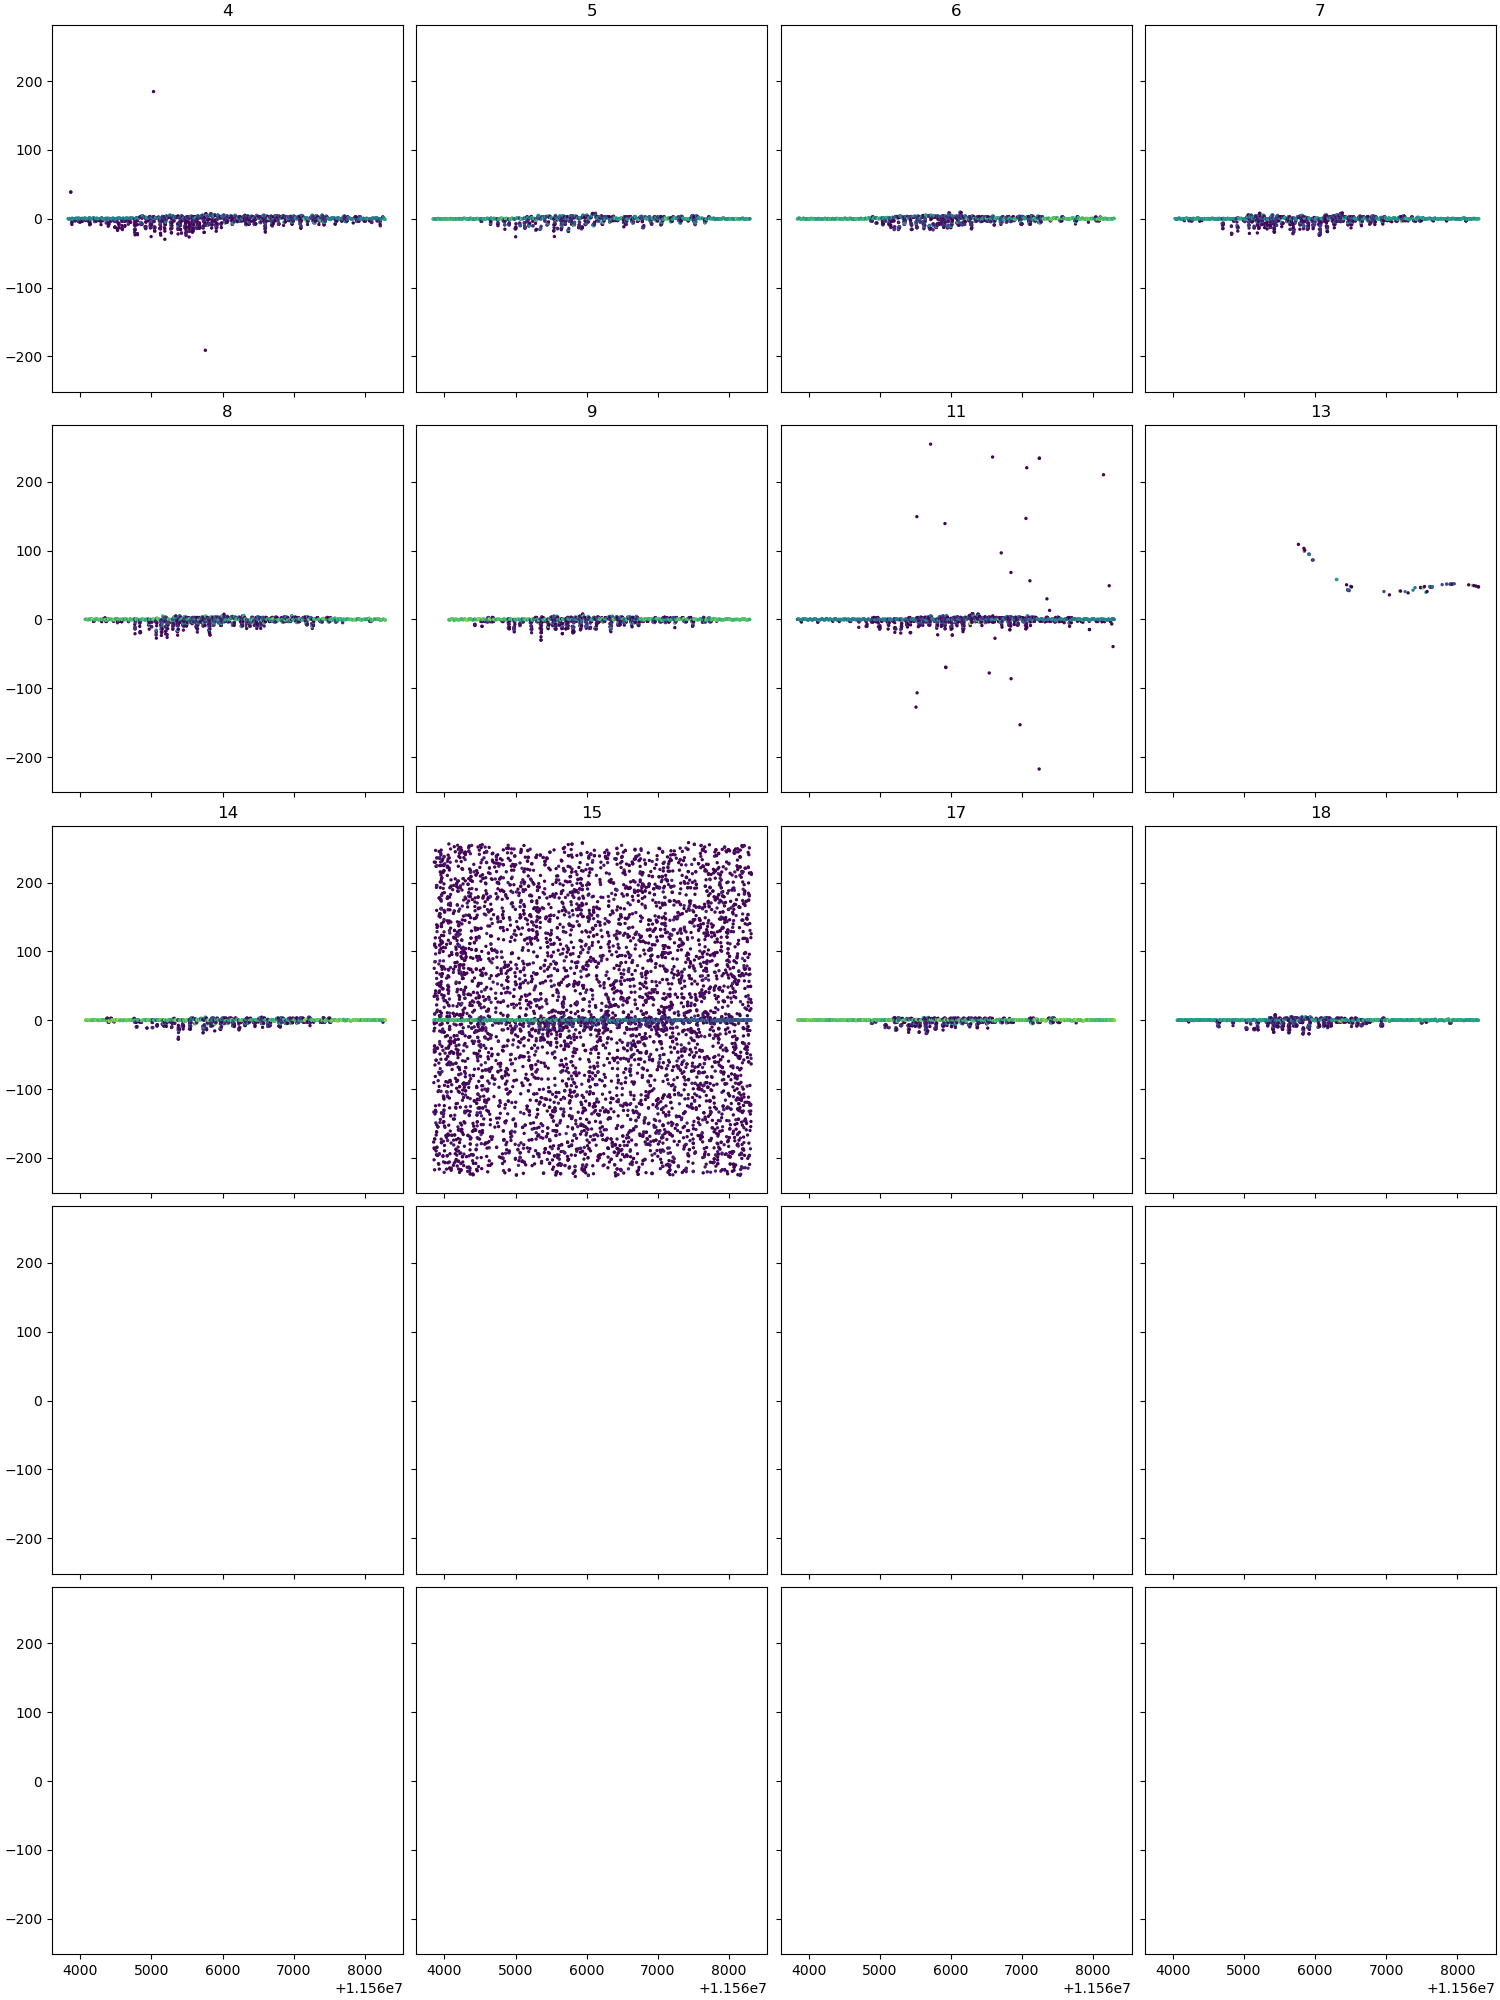

In [50]:
group='rgt1261_p3_strong'

hf, hax=plt.subplots(5, 4, layout='constrained', sharex=True, sharey=True, figsize=[15, 20])
for ax, (cycle, Di) in zip(hax.ravel(), D[group].items()):
    ax.scatter(Di.x_atc, Di.dh,2, c=Di.N)
    ax.set_title(cycle)


In [21]:
DD[0]

<class 'pointCollection.data.data'> with shape (0,),
with fields:
['N', 'dh', 'h', 'x', 'x_atc', 'y']

In [ ]:
hf, hax=plt.subplots(5, 4, layout='constrained', sharex=True, sharey=True, figsize=[15, 20])

for cycle, ax in zip(range(2, 19), hax.ravel()):
    cycle_group=f'cycle_{cycle}'
    plt.sca(ax)
    D=[]
    for group in directory[cycle_group]:
        D += [pc.data().from_h5(thefile, group=os.path.join(cycle_group, group))]
    D=pc.data().from_list(D)
        
    under=np.flatnonzero(D.dh < -10)
    ii=under[np.argsort(D.N[under])]
    
    ax.scatter(D.x[ii], D.y[ii], 2, c=D.N[ii], clim=[0, 10])
    ax.set_aspect(1)
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
hf, hax=plt.subplots(5, 4, layout='constrained', sharex=True, sharey=True, figsize=[15, 20])

for cycle, ax in zip(range(2, 19), hax.ravel()):
    cycle_group=f'cycle_{cycle}'
    plt.sca(ax)
    D=[]
    for group in directory[cycle_group]:
        D += [pc.data().from_h5(thefile, group=os.path.join(cycle_group, group))]
    D=pc.data().from_list(D)
        
    under=np.flatnonzero(D.dh < -20)
    ii=under[np.argsort(D.N[under])]
    
    ax.scatter(D.x[ii], D.y[ii], 2, c=D.N[ii], clim=[0, 10])
    ax.set_aspect(1)
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
hf, hax=plt.subplots(5, 4, layout='constrained', sharex=True, sharey=True, figsize=[15, 20])

for cycle, ax in zip(range(2, 19), hax.ravel()):
    cycle_group=f'cycle_{cycle}'
    plt.sca(ax)
    D=[]
    for group in directory[cycle_group]:
        D += [pc.data().from_h5(thefile, group=os.path.join(cycle_group, group))]
    D=pc.data().from_list(D)
        
    above=np.flatnonzero(D.dh > 20)
    ii=above[np.argsort(D.N[above])]
    
    ax.scatter(D.x[ii], D.y[ii], 2, c=D.N[ii], clim=[0, 10])
    ax.set_aspect(1)
    ax.set_xticks([])
    ax.set_yticks([])

In [53]:
params = {
    # processing parameters
    "srt": icesat2.SRT_LAND_ICE,
    "len": 20,
    # classification and checks
    # still return photon segments that fail checks
    "pass_invalid": True, 
    # all photons
    "cnf": 0, 
    "yapc": dict(knn=0, win_h=3, win_x=5.5, min_ph=4, score=0), 
}

# ICESat-2 data release
release = '006'

# time bounds for CMR query
time_start = '2019-03-03'
time_end = '2025-01-01'

def get_photons_for_granule(poly, granule,  params=None):

    if params is None:
        params = {
        # processing parameters
        "srt": icesat2.SRT_LAND_ICE,
        "len": 20,
        # classification and checks
        # still return photon segments that fail checks
        "pass_invalid": True, 
        # all photons
        "cnf": 0, 
        "yapc": dict(knn=0, win_h=3, win_x=5.5, min_ph=4, score=0), 
        }
    params.update(poly=poly)
    
    re_03 = re.compile('ATL.._\d+_(\d{4})(\d\d)\d\d_')
    rgt, cycle = [*map(int, re_03.search(granule).groups())]

    gdf_03 = icesat2.atl03sp(params, resources=[granule]).to_crs(3413)
    D_dict={}
    if 'height' not in gdf_03.keys():
        return D_dict    
    try:
        pairs = np.array(gdf_03['track'])
        strengths = np.mod(gdf_03['spot'],2)
        D_dict={}
        
        for pair in np.unique(pairs):
            for strength in np.unique(strengths):
                ii = np.flatnonzero((pairs==pair) & (strengths==strength))
                if len(ii)==0:
                    continue
                D_dict[tuple([cycle, rgt, pair, strength])]= pc.data().from_dict({
                    'x':gdf_03.geometry.x[ii],
                    'y':gdf_03.geometry.y[ii],
                    'x_atc':gdf_03.segment_dist[ii]+gdf_03.x_atc[ii],
                    'z':gdf_03.height[ii],
                    'spot':gdf_03.spot[ii],
                    'yapc':gdf_03.yapc_score[ii],
                    'track':gdf_03.track[ii],
                    })
        
    except Exception as e:
        print("get_photons_for_granule: caught exception:" + str(e))
    return D_dict

In [57]:
granule='ATL03_20190620070008_12680303_006_02.h5'
df=gpd.read_file('Nordenskold_crevasse_search.geojson')
poly=[{'lat':ii[1],'lon':ii[0]} for ii in df.to_crs(4326).geometry[0].exterior.coords]

D03_dict = get_photons_for_granule(poly, granule)


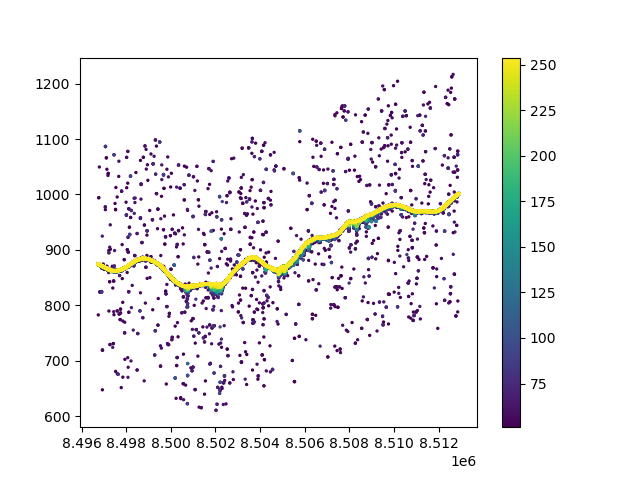

In [60]:
plt.figure();
this_key=list(D03_dict.keys())[1]
D03_full=D03_dict[this_key]

ii=np.array(np.argsort(D03_full.yapc))
ii=ii[np.array(D03_full.yapc[ii])> 50]
plt.colorbar(plt.scatter(D03_full.x_atc[ii], D03_full.z[ii],2, c=D03_full.yapc[ii]))


In [61]:
this_key

(3, 1268, 1, 1)

In [69]:
np.round(plt.gca().get_xlim())

array([8501481., 8502479.])

In [68]:
D03_full.to_h5('ATL03_20190620070008_12680303_006_02_pair_1_subset.h5')

In [67]:
D03_full

<class 'pointCollection.data.data'> with shape (409053,),
with fields:
['x', 'y', 'x_atc', 'z', 'spot', 'yapc', 'track']